# Bigger Regex Examples

## 1. Git Logs

In [3]:
from subprocess import check_output

In [5]:
output = check_output(["git", "log"])
type(output)

bytes

In [6]:
output_str = str(output, encoding="utf-8")
type(output_str)

str

In [16]:
# (1) commit nums, (2) day of week people are working, (3) commit authors, (4) find lines that mention projects
print(output_str[:400])

commit 3b75172ae0671d6075dc58c3acf2c788bd77b4f6
Author: Nils Palumbo <nilspalumbo@users.noreply.github.com>
Date:   Tue Apr 5 15:32:48 2022 -0500

    sic clarification

commit 8af4824a31c4d4fe7f84418f900bf629c132bb70
Author: Nils Palumbo <nilspalumbo@users.noreply.github.com>
Date:   Tue Apr 5 15:29:56 2022 -0500

    sic clarification

commit 89d48b7a37433e997417e69f7c3f45b73baf1987
Merge: 90aa7


In [21]:
# commit nums
import re

commits = re.findall(r"[\da-f]{32}", output_str)
commits[:5]
# commits

['3b75172ae0671d6075dc58c3acf2c788',
 '8af4824a31c4d4fe7f84418f900bf629',
 '89d48b7a37433e997417e69f7c3f45b7',
 '90aa70da55c3499a45542729982fc925',
 '5b93916534885881a776a70522353c54']

In [22]:
# day of week
days = re.findall(r"Date:\s*\w+", output_str)
days[:5]

['Date:   Tue', 'Date:   Tue', 'Date:   Tue', 'Date:   Tue', 'Date:   Tue']

In [23]:
# day of week
days = re.findall(r"Date:\s*(\w+)", output_str)
days[:5]

['Tue', 'Tue', 'Tue', 'Tue', 'Tue']

In [24]:
import pandas as pd
pd.Series(days).value_counts()

Mon    49
Tue    33
Sat    21
Thu    21
Wed    19
Fri    15
Sun     7
dtype: int64

<AxesSubplot:>

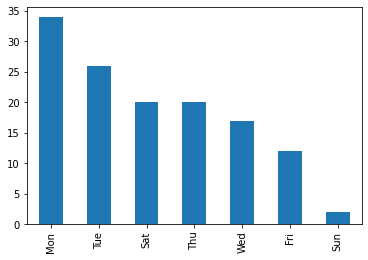

In [22]:
pd.Series(days).value_counts().plot.bar()

In [26]:
print(output_str[:400])

commit a2e8559bd376a7c5d71a9b6ee134377074f94f92
Author: tylerharter <tylerharter@gmail.com>
Date:   Sat Mar 26 13:22:00 2022 -0500

    release lab 10

commit c579fba91276d0c0917f1e7c38b1d7508aa9dda7
Author: tylerharter <tylerharter@gmail.com>
Date:   Sat Mar 26 13:20:37 2022 -0500

    release lab 10

commit 67fe330e970d73caa5a2898ed244bcca11eba492
Merge: 7704410 4637d21
Author: Tyler <tharter@wi


In [30]:
# author
authors = re.findall(r"Author:\s*(.+)\s*<", output_str)
print(authors)

['Nils Palumbo ', 'Nils Palumbo ', 'Nils Palumbo ', 'Nils Palumbo ', 'tylerharter ', 'tylerharter ', 'Tyler ', 'Nils Palumbo ', 'Nils Palumbo ', 'Tyler ', 'brycejoh16 ', 'Garrison Waugh ', 'Nils Palumbo ', 'Nils Palumbo ', 'Nils Palumbo ', 'Nils Palumbo ', 'tylerharter ', 'tylerharter ', 'Tyler ', 'Nils Palumbo ', 'Nils Palumbo ', 'Garrison Waugh ', 'Tyler ', 'tylerharter ', 'tylerharter ', 'Tyler ', 'Tyler ', 'Nils Palumbo ', 'Nils Palumbo ', 'Garrison Waugh ', 'Garrison Waugh ', 'Tyler ', 'Tyler ', 'Garrison Waugh ', 'tylerharter ', 'tylerharter ', 'Tyler ', 'Tyler ', 'tylerharter ', 'Tyler ', 'Garrison Waugh ', 'Garrison Waugh ', 'tylerharter ', 'tylerharter ', 'tylerharter ', 'tylerharter ', 'Tyler ', 'tylerharter ', 'Yiyin Shen ', 'Yiyin Shen ', 'Yiyin Shen ', 'Yiyin Shen ', 'WangHanSolo ', 'Tyler ', 'tylerharter ', 'Garrison Waugh ', 'tylerharter ', 'tylerharter ', 'Tyler ', 'Tyler ', 'tylerharter ', 'Tyler ', 'Tyler ', 'Tyler ', 'Dhananjayan P N ', 'Dhananjayan P N ', 'Tyler ', 

In [32]:
# author
authors = re.findall(r"Author:\s*(.+?)\s*<", output_str)
print(authors)

['Nils Palumbo', 'Nils Palumbo', 'Nils Palumbo', 'Nils Palumbo', 'tylerharter', 'tylerharter', 'Tyler', 'Nils Palumbo', 'Nils Palumbo', 'Tyler', 'brycejoh16', 'Garrison Waugh', 'Nils Palumbo', 'Nils Palumbo', 'Nils Palumbo', 'Nils Palumbo', 'tylerharter', 'tylerharter', 'Tyler', 'Nils Palumbo', 'Nils Palumbo', 'Garrison Waugh', 'Tyler', 'tylerharter', 'tylerharter', 'Tyler', 'Tyler', 'Nils Palumbo', 'Nils Palumbo', 'Garrison Waugh', 'Garrison Waugh', 'Tyler', 'Tyler', 'Garrison Waugh', 'tylerharter', 'tylerharter', 'Tyler', 'Tyler', 'tylerharter', 'Tyler', 'Garrison Waugh', 'Garrison Waugh', 'tylerharter', 'tylerharter', 'tylerharter', 'tylerharter', 'Tyler', 'tylerharter', 'Yiyin Shen', 'Yiyin Shen', 'Yiyin Shen', 'Yiyin Shen', 'WangHanSolo', 'Tyler', 'tylerharter', 'Garrison Waugh', 'tylerharter', 'tylerharter', 'Tyler', 'Tyler', 'tylerharter', 'Tyler', 'Tyler', 'Tyler', 'Dhananjayan P N', 'Dhananjayan P N', 'Tyler', 'Tyler', 'Tyler Caraza-Harter', 'Garrison Waugh', 'Garrison Waugh',

In [34]:
# find all lines that mention a project (p1, P2, ...)
lines = re.findall(r".*[pP]\d+.*", output_str)
lines = [line.strip() for line in lines]
lines

['p5 note',
 'p5 update',
 'p5, lab 11',
 'p5 draft',
 'p5 draft',
 'p4 tips',
 'p4 release',
 'p4 updates',
 'P4 tester',
 'un-release P4',
 'p4 draft',
 'Changed s22 README.md back to original README.md. Was accidentally changed to hold p3 draft instead of nav links.',
 'release p3',
 'p3 updates',
 'p3 updates',
 'p3 screenshot',
 'p3 updates',
 'complete p3 tester',
 'p3 draft',
 'p2 corrections',
 'Correction to p2 Q7',
 'p2 updates',
 'p2 updates',
 'release P2',
 'p2 testing info',
 '320 p2 clarification',
 'finish p2 search_test',
 'finish p2 loans_test',
 'p2 module tester started',
 'p2 draft',
 'p2 draft',
 'release p1',
 'p1 draft']

## 2. Emails

In [43]:
text = """
Tyler [Instructor] - tharter (AT) wisc.edu
Cong [Head TA] - cding44 (AT) wisc.edu
Bryce [TA] - bcjohnson7 (AT) wisc.edu
Connor [TA] - cbailey9 (AT) wisc.edu
Han [TA] - hwang638 (AT) wisc.edu
Hardik [TA] - hchauhan2 (AT) wisc.edu
Keaton [TA] - kleppanen (AT) wisc.edu
Nils [TA] - npalumbo (AT) wisc.edu
Yiyin [TA] - yshen82 (AT) wisc.edu
tharter@wisc.edu
"""

In [39]:
import requests
resp = requests.get("https://tyler.caraza-harter.com/cs320/s22/contact.html")
resp.raise_for_status()
text = resp.text.replace("<b>", "").replace("</b>", "")

/tmp/ipykernel_25434/1704182618.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [67]:
name = r"(\w+)"
at = r"([\(\[]?(@|at|AT)[\)\]]?)"
domain = r"(\w+\.(edu|com|net|org|io))"

regex = f"({name}\s*{at}\s*{domain})"

print(regex)
for tup in re.findall(regex, text):
    print(tup[1] + "@" + tup[4])

((\w+)\s*([\(\[]?(@|at|AT)[\)\]]?)\s*(\w+\.(edu|com|net|org|io)))
tharter@wisc.edu
cding44@wisc.edu
bcjohnson7@wisc.edu
cbailey9@wisc.edu
hwang638@wisc.edu
hchauhan2@wisc.edu
kleppanen@wisc.edu
npalumbo@wisc.edu
yshen82@wisc.edu


## 3. Function Names

In [52]:
from shapely.geometry import box, Point
x= box(0,0,2,2)
y=box(1,1,3,3)

In [47]:
import numpy as np

A=np.array([[6,4],[1,3]])
B=np.array([[5],[2]])
print(A*B)
print(A)
print(B)

[[30 20]
 [ 2  6]]
[[6 4]
 [1 3]]
[[5]
 [2]]


In [42]:
np.dot(A,B)

array([[38],
       [11]])

In [55]:
import flask
app = flask.Flask("my application")

@app.route("/")
def home():
    print("X")
    return '<html><body><img src="example.svg"></body></html>'
    
@app.route("/example.svg")
def handler1():
    print("Y")
    return "TODO"
@app.route("/out.svg")
def handler2():
    print("Z")
    return "TODO"
if __name__ == "main":
    app.run(host ="0.0.0.0", debug = True, threaded = False)

 * Serving Flask app 'my application' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on all addresses.
 * Running on http://10.128.0.2:5000/ (Press CTRL+C to quit)
 * Restarting with stat
Traceback (most recent call last):
  File "/home/charles/.local/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/charles/.local/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.initialize(argv)
  File "/home/charles/.local/lib/python3.8/site-packages/traitlets/config/application.py", line 88, in inner
    return method(app, *args, **kwargs)
  File "/home/charles/.local/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 632, in initialize
    self.init_sockets()
  File "/home/charles/.local/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 282, in init_sockets
    self.shell_port = self._bind_socket(self.shell_socket, self.shell_port)
  File "/home/charles/.local/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 229, in _bind_socket
   

SystemExit: 1

/home/charles/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3259: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
